In [ ]:
# #sklearn 1.1.0버전으로 재설치

# !pip uninstall sklearn
# !pip install --upgrade sklearn
# !pip install scikit-learn==1.1.0 --user

# #버전 확인(커널 닫았다가 열기)
# import sklearn
# sklearn.__version__

# #오버샘플링
# #pip install imblearn

# #xgboost
# pip install xgboost

In [ ]:
# 코랩용 나눔폰트 설치, 실행후 런타임 다시 시작해야함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## 데이터 불러오기, 개요 확인

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

%matplotlib inline

In [ ]:
#코랩용
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
food = pd.read_csv('한식 생존.csv', encoding='cp949') #csv 불러오기 주피터용

In [ ]:
# food = pd.read_csv('/content/drive/MyDrive/bigdata_ML/한식 생존.csv', encoding='cp949') #csv 불러오기 코랩용

In [ ]:
food.head() #csv 5행만 보기

,사업장명,소재지면적,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업,타업종비율,...,아파트 세대수,제곱미터 당 임대료,임대료,총생활인구수,점심저녁시간대 생활인구수,골목상권,발달상권,구분불가,전통시장,관광특구
0,은비 보리밥 고기부페,75,92,7,159,716,577,705,1282,0.441498,...,7148,30987.5555,2339,11670.19361,10936.29824,1,0,0,0,0
1,돈이네,25,87,8,150,693,534,683,1217,0.430567,...,9216,30987.5555,775,11670.19361,10936.29824,1,0,0,0,0
2,자매식당,25,90,8,159,637,508,641,1149,0.445605,...,8923,30987.5555,775,11670.19361,10936.29824,1,0,0,0,0
3,시창이네,24,88,8,169,621,500,624,1124,0.447509,...,11259,30987.5555,747,11670.19361,10936.29824,1,0,0,0,0
4,꼬꼬C참숯불닭갈비,40,88,7,164,608,484,612,1096,0.445255,...,10273,30987.5555,1253,11670.19361,10936.29824,1,0,0,0,0


In [ ]:
food.info() #데이터 개요 확인 (열이름, 개수,데이터유형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18252 entries, 0 to 18251
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   사업장명           18252 non-null  object 
 1   소재지면적          18252 non-null  int64  
 2   교통 수           18252 non-null  int64  
 3   집객시설 수         18252 non-null  int64  
 4   교육 수           18252 non-null  int64  
 5   경쟁자 수          18252 non-null  int64  
 6   인허가 영업         18252 non-null  int64  
 7   인허가 폐업         18252 non-null  int64  
 8   인허가 영업+폐업      18252 non-null  int64  
 9   타업종비율          18252 non-null  float64
 10  타업종경쟁자         18252 non-null  int64  
 11  버퍼내폐업비율        18252 non-null  float64
 12  영업기간           18252 non-null  int64  
 13  생존여부           18252 non-null  int64  
 14  아파트 세대수        18252 non-null  int64  
 15  제곱미터 당 임대료     18252 non-null  float64
 16  임대료            18252 non-null  int64  
 17  총생활인구수         18252 non-null  float64
 18  점심저녁시간

# 결측치 확인 및 전처리

In [ ]:
#문자형 변수 확인
object_columns = food.columns[food.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 확인
food[object_columns]

object 칼럼은 다음과 같습니다 :  ['사업장명']


,사업장명
0,은비 보리밥 고기부페
1,돈이네
2,자매식당
3,시창이네
4,꼬꼬C참숯불닭갈비
...,...
18247,고기가 두근두근
18248,진칼국수
18249,인생모밀
18250,가마솥 감자탕


In [ ]:
feature1columns =list(food.columns.difference(food[object_columns].columns)) #필요없는 문자형 변수 제외
food=food[feature1columns]

KeyError: ignored

In [ ]:
food

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,제곱미터 당 임대료,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,716,1,0,159,92,0,0,0.549922,0,75,...,1282,705,2339,0,10936.29824,30987.55550,7,11670.19361,566,0.441498
1,693,1,0,150,87,0,0,0.561216,0,25,...,1217,683,775,0,10936.29824,30987.55550,8,11670.19361,524,0.430567
2,637,1,0,159,90,0,0,0.557876,0,25,...,1149,641,775,0,10936.29824,30987.55550,8,11670.19361,512,0.445605
3,621,1,0,169,88,0,0,0.555160,0,24,...,1124,624,747,0,10936.29824,30987.55550,8,11670.19361,503,0.447509
4,608,1,0,164,88,0,0,0.558394,1,40,...,1096,612,1253,0,10936.29824,30987.55550,7,11670.19361,488,0.445255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18247,1257,0,0,220,78,1,0,0.526137,0,99,...,2066,1087,2968,0,55277.92730,29924.51000,11,55951.10631,809,0.391578
18248,568,0,0,302,66,1,0,0.521351,0,135,...,1007,525,4286,0,55277.92730,31748.43375,8,55951.10631,439,0.435948
18249,1260,0,0,221,84,1,0,0.509116,0,43,...,2139,1089,1328,0,55277.92730,30875.16667,13,55951.10631,879,0.410940
18250,1132,0,0,209,75,1,0,0.510182,0,53,...,1866,952,1573,0,55277.92730,29924.51000,12,55951.10631,734,0.393355


In [ ]:
feature2columns =list(food.columns.difference(food[['영업기간', '제곱미터 당 임대료']].columns)) #추가로 필요없는 변수 제외
food=food[feature2columns]

In [ ]:
food

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,716,1,0,159,92,0,0,0.549922,0,75,...,577,1282,705,2339,0,10936.29824,7,11670.19361,566,0.441498
1,693,1,0,150,87,0,0,0.561216,0,25,...,534,1217,683,775,0,10936.29824,8,11670.19361,524,0.430567
2,637,1,0,159,90,0,0,0.557876,0,25,...,508,1149,641,775,0,10936.29824,8,11670.19361,512,0.445605
3,621,1,0,169,88,0,0,0.555160,0,24,...,500,1124,624,747,0,10936.29824,8,11670.19361,503,0.447509
4,608,1,0,164,88,0,0,0.558394,1,40,...,484,1096,612,1253,0,10936.29824,7,11670.19361,488,0.445255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18247,1257,0,0,220,78,1,0,0.526137,0,99,...,979,2066,1087,2968,0,55277.92730,11,55951.10631,809,0.391578
18248,568,0,0,302,66,1,0,0.521351,0,135,...,482,1007,525,4286,0,55277.92730,8,55951.10631,439,0.435948
18249,1260,0,0,221,84,1,0,0.509116,0,43,...,1050,2139,1089,1328,0,55277.92730,13,55951.10631,879,0.410940
18250,1132,0,0,209,75,1,0,0.510182,0,53,...,914,1866,952,1573,0,55277.92730,12,55951.10631,734,0.393355


In [ ]:
#출처 : https://dacon.io/competitions/official/235959/codeshare/5934?page&dtype&ptype&fType
# 결측치가 얼마나 있는지 확인합니다. 
# csv형태에서 먼저 결측치있는 행을 제거하여 null값이 없습니다

food.isna().sum()

경쟁자 수            0
골목상권             0
관광특구             0
교육 수             0
교통 수             0
구분불가             0
발달상권             0
버퍼내폐업비율          0
생존여부             0
소재지면적            0
아파트 세대수          0
인허가 영업           0
인허가 영업+폐업        0
인허가 폐업           0
임대료              0
전통시장             0
점심저녁시간대 생활인구수    0
집객시설 수           0
총생활인구수           0
타업종경쟁자           0
타업종비율            0
dtype: int64

# EDA

In [ ]:
food.describe(include="all") #데이터의 통계적인 개요 확인

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
count,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,...,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000
mean,943.935295,0.298050,0.002849,215.287092,83.847414,0.444609,0.215593,0.491220,0.161571,75.502575,...,877.791749,1731.934692,854.142943,2859.723428,0.038900,34657.428140,26.496165,32534.044664,787.999397,0.438984
std,469.634037,0.457414,0.053301,183.819092,26.844189,0.496936,0.411244,0.056827,0.368067,100.549514,...,487.856053,961.395843,496.071888,4295.279773,0.193362,23330.201535,46.088674,18220.445488,525.157830,0.065034
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190476,0.000000,1.000000,...,1.000000,7.000000,5.000000,79.000000,0.000000,3443.532098,0.000000,2960.416900,1.000000,0.093750
25%,617.000000,0.000000,0.000000,110.000000,65.000000,0.000000,0.000000,0.467389,0.000000,28.000000,...,532.750000,1087.000000,530.000000,931.000000,0.000000,19314.258850,8.000000,20010.314920,448.000000,0.396242
50%,876.000000,0.000000,0.000000,170.000000,83.000000,0.000000,0.000000,0.501293,0.000000,46.000000,...,775.000000,1516.000000,731.000000,1635.000000,0.000000,27888.344530,12.000000,28261.053150,623.000000,0.426947
75%,1183.000000,1.000000,0.000000,266.000000,101.000000,1.000000,0.000000,0.529512,0.000000,86.000000,...,1094.000000,2118.000000,1034.000000,3157.000000,0.000000,42482.926150,19.000000,40525.722990,941.000000,0.470656
max,2686.000000,1.000000,1.000000,1655.000000,177.000000,1.000000,1.000000,0.866667,1.000000,3072.000000,...,2634.000000,5145.000000,2802.000000,135435.000000,1.000000,134994.908800,324.000000,108753.472800,2961.000000,0.713208


In [ ]:
#주피터에서
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
# #코랩에서
# plt.rc('font', family='NanumBarunGothic') 

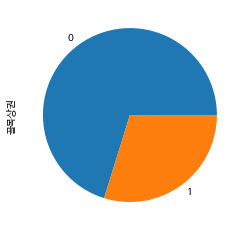

In [ ]:
food['골목상권'].value_counts().plot(kind="pie") #범주형 데이터 확인

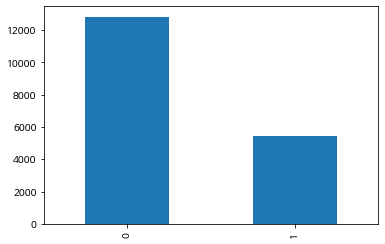

In [ ]:
food['골목상권'].value_counts().plot(kind="bar") #범주형 데이터 확인

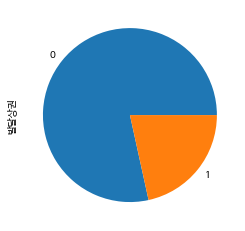

In [ ]:
food['발달상권'].value_counts().plot(kind="pie") #범주형 데이터 확인

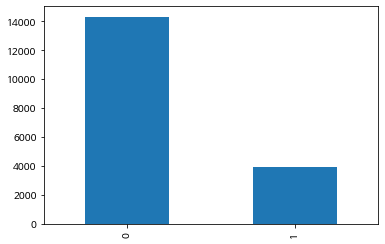

In [ ]:
food['발달상권'].value_counts().plot(kind="bar") #범주형 데이터 확인

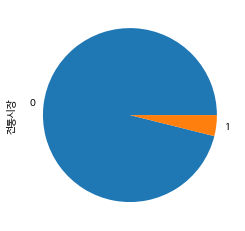

In [ ]:
food['전통시장'].value_counts().plot(kind="pie") #범주형 데이터 확인

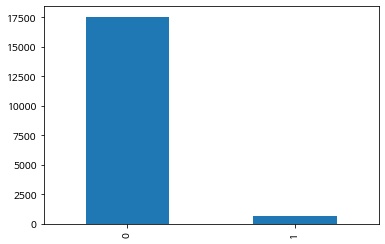

In [ ]:
food['전통시장'].value_counts().plot(kind="bar") #범주형 데이터 확인

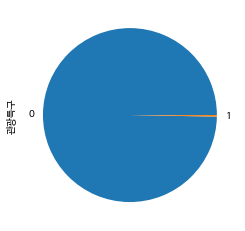

In [ ]:
food['관광특구'].value_counts().plot(kind="pie")#범주형 데이터 확인

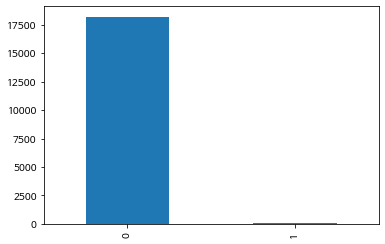

In [ ]:
food['관광특구'].value_counts().plot(kind="bar")#범주형 데이터 확인

In [ ]:
food['생존여부'].value_counts() #범주형 target 데이터 확인

0    15303
1     2949
Name: 생존여부, dtype: int64

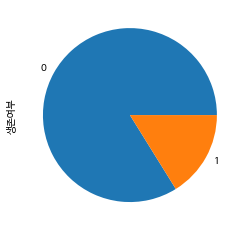

In [ ]:
food['생존여부'].value_counts().plot(kind="pie") #원그래프로 범주형 데이터 확인 

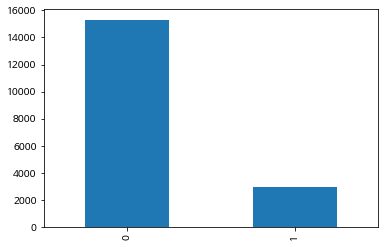

In [ ]:
food['생존여부'].value_counts().plot(kind="bar") #막대그래프로 범주형 데이터 확인, 폐업이 더 많이 차지합니다. 데이터가 불균형합니다

In [ ]:
food.columns #열이름 확인

Index(['경쟁자 수', '골목상권', '관광특구', '교육 수', '교통 수', '구분불가', '발달상권', '버퍼내폐업비율',
       '생존여부', '소재지면적', '아파트 세대수', '인허가 영업', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '전통시장', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자', '타업종비율'],
      dtype='object')

In [ ]:
#연속형 변수 기초통계량 확인
food[["교통 수","집객시설 수","교육 수","경쟁자 수","인허가 영업","인허가 폐업","인허가 영업+폐업"]].describe()
# 교통 수 제외 모두 이상치 많이 있을 것으로 예상 (mean, min, max, 분산 확인결과)

,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업
count,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000
mean,83.847414,26.496165,215.287092,943.935295,877.791749,854.142943,1731.934692
std,26.844189,46.088674,183.819092,469.634037,487.856053,496.071888,961.395843
min,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,7.000000
25%,65.000000,8.000000,110.000000,617.000000,532.750000,530.000000,1087.000000
50%,83.000000,12.000000,170.000000,876.000000,775.000000,731.000000,1516.000000
75%,101.000000,19.000000,266.000000,1183.000000,1094.000000,1034.000000,2118.000000
max,177.000000,324.000000,1655.000000,2686.000000,2634.000000,2802.000000,5145.000000


In [ ]:
#연속형 변수 기초통계량 확인
food[["타업종비율","타업종경쟁자","버퍼내폐업비율","아파트 세대수","임대료","총생활인구수",
      "점심저녁시간대 생활인구수"]].describe()


,타업종비율,타업종경쟁자,버퍼내폐업비율,아파트 세대수,임대료,총생활인구수,점심저녁시간대 생활인구수
count,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000,18252.000000
mean,0.438984,787.999397,0.491220,9826.902805,2859.723428,32534.044664,34657.428140
std,0.065034,525.157830,0.056827,6697.209702,4295.279773,18220.445488,23330.201535
min,0.093750,1.000000,0.190476,0.000000,79.000000,2960.416900,3443.532098
25%,0.396242,448.000000,0.467389,4650.000000,931.000000,20010.314920,19314.258850
50%,0.426947,623.000000,0.501293,8630.000000,1635.000000,28261.053150,27888.344530
75%,0.470656,941.000000,0.529512,13422.000000,3157.000000,40525.722990,42482.926150
max,0.713208,2961.000000,0.866667,40918.000000,135435.000000,108753.472800,134994.908800


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

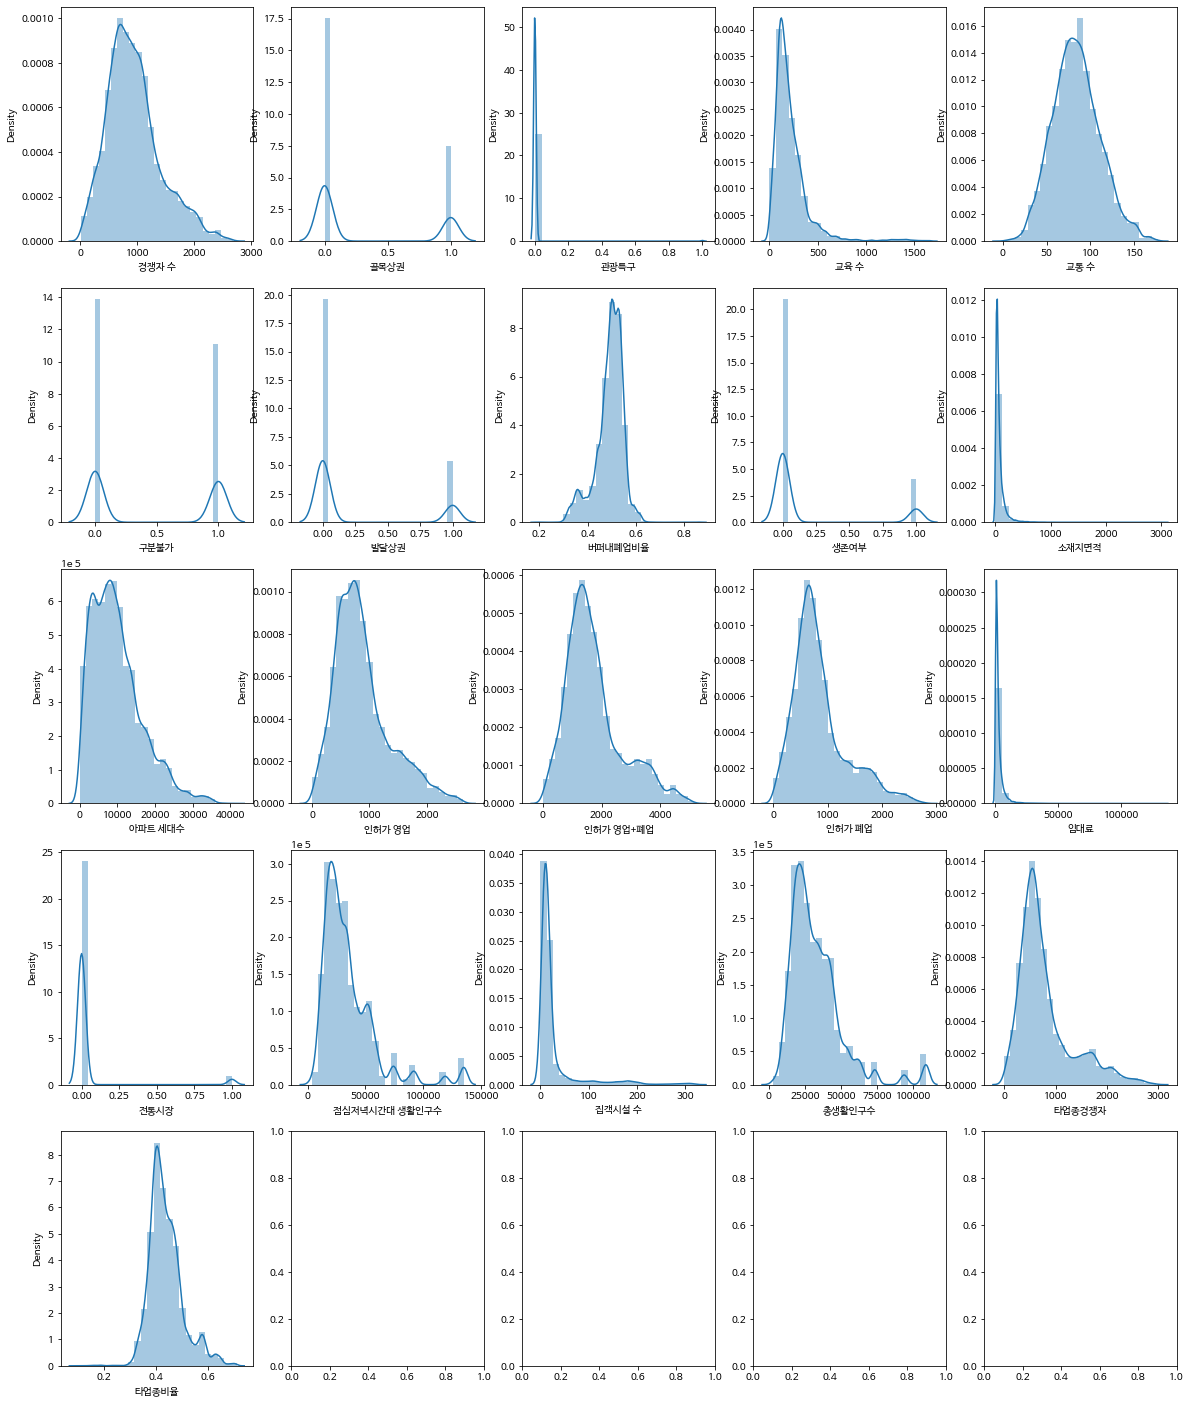

In [ ]:
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(food.columns):
    sns.distplot(food[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 
#전체 히스토그램그려보기

In [ ]:
for col in food:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(food[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(food[col].kurt())  
         ) #왜도 첨도 확인
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]
#log변환 필요한 연속형 변수(왜도가 -1~1 밖의 값) : '교육 수',  '소재지면적', '아파트 세대수', '인허가 영업','인허가 영업+폐업','인허가 폐업','임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수','타업종경쟁자'

경쟁자 수           Skewness: 00.76     Kurtosis: 000.50
골목상권            Skewness: 00.88     Kurtosis: -01.22
관광특구            Skewness: 18.66     Kurtosis: 346.10
교육 수            Skewness: 03.42     Kurtosis: 017.42
교통 수            Skewness: 00.27     Kurtosis: -00.01
구분불가            Skewness: 00.22     Kurtosis: -01.95
발달상권            Skewness: 01.38     Kurtosis: -00.09
버퍼내폐업비율         Skewness: -0.91     Kurtosis: 001.34
생존여부            Skewness: 01.84     Kurtosis: 001.38
소재지면적           Skewness: 07.44     Kurtosis: 120.26
아파트 세대수         Skewness: 01.02     Kurtosis: 001.00
인허가 영업          Skewness: 01.00     Kurtosis: 000.75
인허가 영업+폐업       Skewness: 01.02     Kurtosis: 000.70
인허가 폐업          Skewness: 01.16     Kurtosis: 001.18
임대료             Skewness: 07.89     Kurtosis: 121.62
전통시장            Skewness: 04.77     Kurtosis: 020.75
점심저녁시간대 생활인구수   Skewness: 02.23     Kurtosis: 006.22
집객시설 수          Skewness: 03.67     Kurtosis: 014.51
총생활인구수          Skewness: 01.90     Kurtosis: 

# 정규화 (로그변환 및 로버스트 스케일링)

In [ ]:
#출처 - https://soo-jjeong.tistory.com/122
Afood1=food.copy()
Arob = Afood1[Afood1.columns.difference([ '교육 수',  '소재지면적', '아파트 세대수', '인허가 영업','인허가 영업+폐업','인허가 폐업','임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수','타업종경쟁자',
                                 '골목상권','관광특구','구분불가','발달상권','전통시장','생존여부'])] #로버스트스케일링할 데이터
Adis =Afood1[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']] #범주형 변수 데이터
Alog =Afood1[[ '교육 수',  '소재지면적', '아파트 세대수', '인허가 영업','인허가 영업+폐업','인허가 폐업','임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수','타업종경쟁자']] #log변환할 데이터

In [ ]:
Alog.head() #log변환할 데이터

,교육 수,소재지면적,아파트 세대수,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,159,75,7148,577,1282,705,2339,10936.29824,7,11670.19361,566
1,150,25,9216,534,1217,683,775,10936.29824,8,11670.19361,524
2,159,25,8923,508,1149,641,775,10936.29824,8,11670.19361,512
3,169,24,11259,500,1124,624,747,10936.29824,8,11670.19361,503
4,164,40,10273,484,1096,612,1253,10936.29824,7,11670.19361,488


In [ ]:
Adis.head() #범주형 데이터

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,1


In [ ]:
Arob.head() #로버스트 스케일링 데이터

,경쟁자 수,교통 수,버퍼내폐업비율,타업종비율
0,716,92,0.549922,0.441498
1,693,87,0.561216,0.430567
2,637,90,0.557876,0.445605
3,621,88,0.555160,0.447509
4,608,88,0.558394,0.445255


In [ ]:
Alog.columns #로그변환할 열 이름

Index(['교육 수', '소재지면적', '아파트 세대수', '인허가 영업', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.507
Kurtosis: 2.301


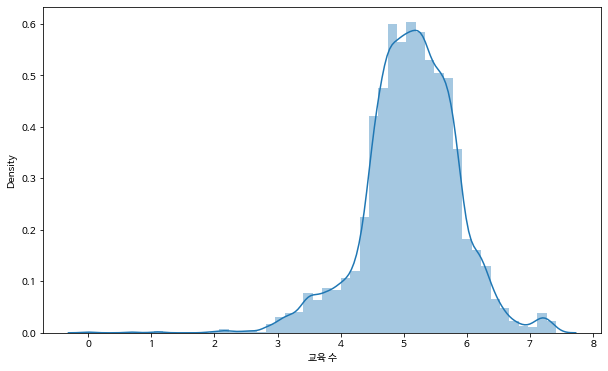

In [ ]:
Alog["교육 수"] = np.log1p(Alog["교육 수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["교육 수"])

print("Skewness: {:.3f}".format(Alog["교육 수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["교육 수"].kurt()))#교육 수 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.502
Kurtosis: 0.409


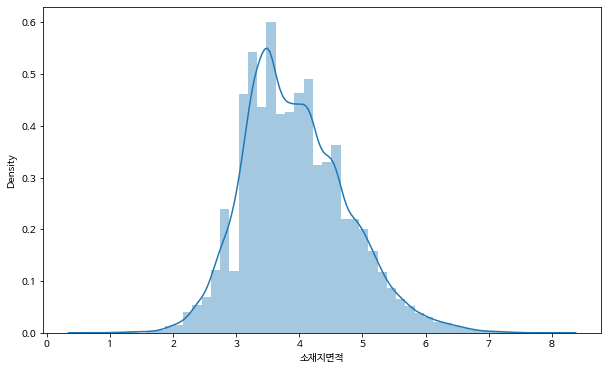

In [ ]:
Alog["소재지면적"] = np.log1p(Alog["소재지면적"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["소재지면적"])

print("Skewness: {:.3f}".format(Alog["소재지면적"].skew()))
print("Kurtosis: {:.3f}".format(Alog["소재지면적"].kurt()))#소재지면적 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -3.122
Kurtosis: 21.897


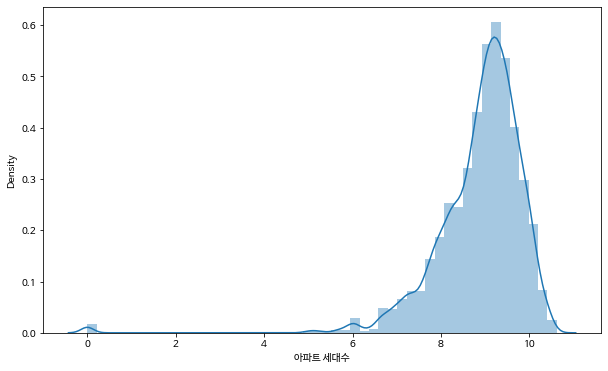

In [ ]:
Alog["아파트 세대수"] = np.log1p(Alog["아파트 세대수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["아파트 세대수"])

print("Skewness: {:.3f}".format(Alog["아파트 세대수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["아파트 세대수"].kurt())) #아파트 세대수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.154
Kurtosis: 4.065


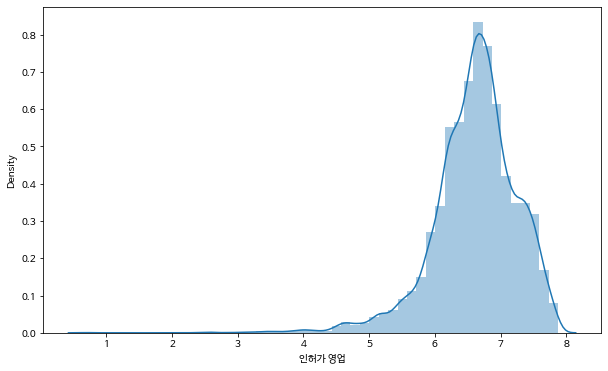

In [ ]:
Alog['인허가 영업'] = np.log1p(Alog['인허가 영업'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['인허가 영업'])

print("Skewness: {:.3f}".format(Alog['인허가 영업'].skew()))
print("Kurtosis: {:.3f}".format(Alog['인허가 영업'].kurt()))#인허가 영업 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.124
Kurtosis: 3.894


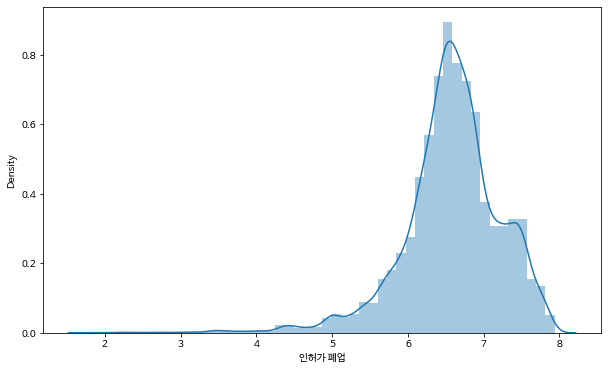

In [ ]:
Alog['인허가 폐업'] = np.log1p(Alog['인허가 폐업'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['인허가 폐업'])

print("Skewness: {:.3f}".format(Alog['인허가 폐업'].skew()))
print("Kurtosis: {:.3f}".format(Alog['인허가 폐업'].kurt())) #인허가 폐업 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.156
Kurtosis: 3.987


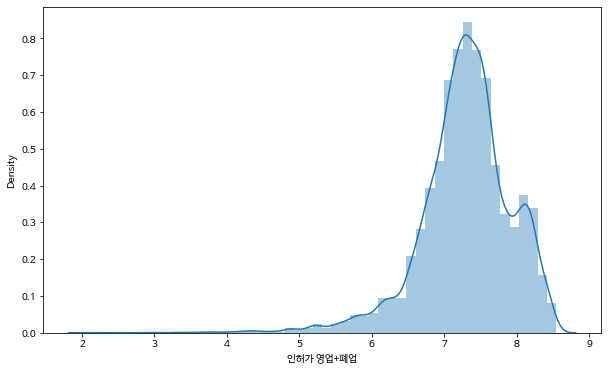

In [ ]:
Alog['인허가 영업+폐업'] = np.log1p(Alog['인허가 영업+폐업'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['인허가 영업+폐업'])

print("Skewness: {:.3f}".format(Alog['인허가 영업+폐업'].skew()))
print("Kurtosis: {:.3f}".format(Alog['인허가 영업+폐업'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #인허가 영업+폐업 log 변환

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.509
Kurtosis: 0.325


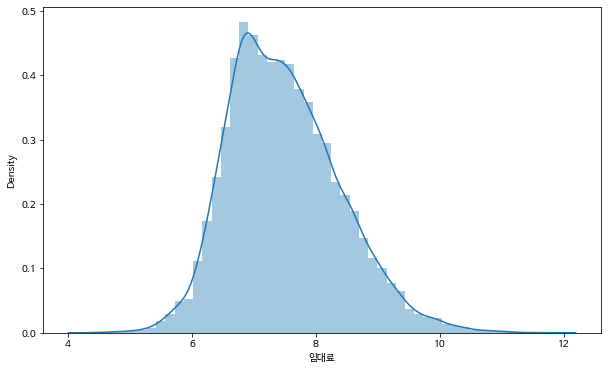

In [ ]:
Alog['임대료'] = np.log1p(Alog['임대료'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['임대료'])

print("Skewness: {:.3f}".format(Alog['임대료'].skew()))
print("Kurtosis: {:.3f}".format(Alog['임대료'].kurt())) #임대료 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.213
Kurtosis: 0.360


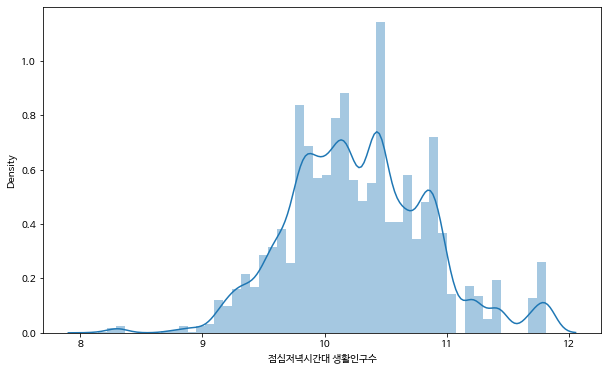

In [ ]:
Alog['점심저녁시간대 생활인구수'] = np.log1p(Alog['점심저녁시간대 생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['점심저녁시간대 생활인구수'])

print("Skewness: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.881
Kurtosis: 1.613


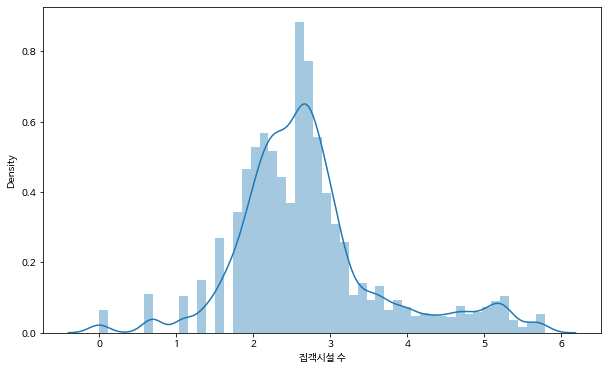

In [ ]:
Alog['집객시설 수'] = np.log1p(Alog['집객시설 수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['집객시설 수'])

print("Skewness: {:.3f}".format(Alog['집객시설 수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['집객시설 수'].kurt())) #집객시설 수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.007
Kurtosis: 0.561


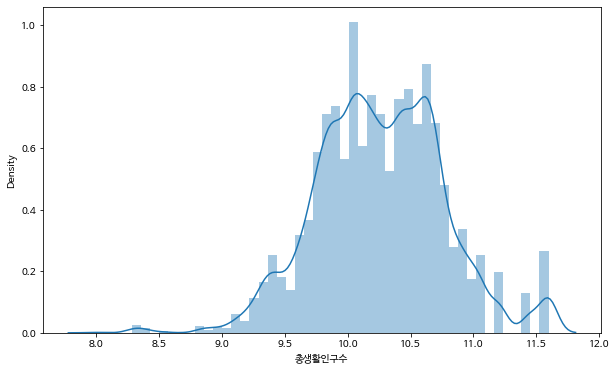

In [ ]:
Alog['총생활인구수'] = np.log1p(Alog['총생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['총생활인구수'])

print("Skewness: {:.3f}".format(Alog['총생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['총생활인구수'].kurt()))#총생활인구수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.863
Kurtosis: 3.644


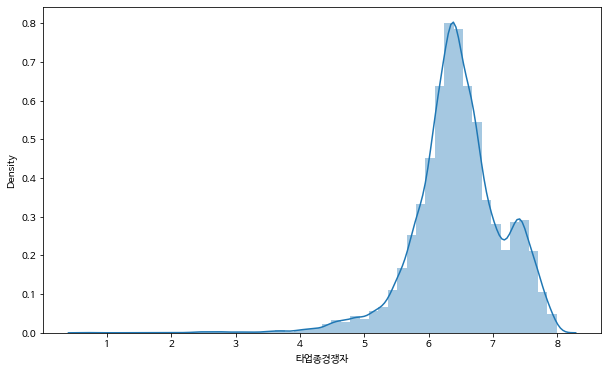

In [ ]:
Alog['타업종경쟁자'] = np.log1p(Alog['타업종경쟁자'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['타업종경쟁자'])

print("Skewness: {:.3f}".format(Alog['타업종경쟁자'].skew()))
print("Kurtosis: {:.3f}".format(Alog['타업종경쟁자'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]

In [ ]:
Alog.head() #log 변환 결과

,교육 수,소재지면적,아파트 세대수,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,5.075174,4.330733,8.874728,6.359574,7.156956,6.559615,7.757906,9.299934,2.079442,9.364879,6.340359
1,5.017280,3.258097,9.128805,6.282267,7.104965,6.527958,6.654153,9.299934,2.197225,9.364879,6.263398
2,5.075174,3.258097,9.096500,6.232448,7.047517,6.464588,6.654153,9.299934,2.197225,9.364879,6.240276
3,5.135798,3.218876,9.329012,6.216606,7.025538,6.437752,6.617403,9.299934,2.197225,9.364879,6.222576
4,5.105945,3.713572,9.237372,6.184149,7.000334,6.418365,7.134094,9.299934,2.079442,9.364879,6.192362


In [ ]:
scaler = RobustScaler() #로버스트 스케일링
df_robust = scaler.fit_transform(Arob)

In [ ]:
robust = pd.DataFrame(df_robust, columns =Arob.columns) #스케일링값 데이터프레임 화

In [ ]:
robust #결과값 확인

,경쟁자 수,교통 수,버퍼내폐업비율,타업종비율
0,-0.282686,0.250000,0.782783,0.195532
1,-0.323322,0.111111,0.964586,0.048642
2,-0.422261,0.194444,0.910826,0.250727
3,-0.450530,0.138889,0.867102,0.276314
4,-0.473498,0.138889,0.919161,0.246031
...,...,...,...,...
18247,0.673145,-0.138889,0.399920,-0.475307
18248,-0.544170,-0.472222,0.322864,0.120959
18249,0.678445,0.027778,0.125929,-0.215117
18250,0.452297,-0.222222,0.143086,-0.451429


In [ ]:
robust[["교육 수",'소재지면적',"아파트 세대수","인허가 영업","인허가 영업+폐업","인허가 폐업",
        "임대료","점심저녁시간대 생활인구수","집객시설 수","총생활인구수","타업종경쟁자"]]=Alog #연속형 변수 데이터프레임 합치기

In [ ]:
robust

,경쟁자 수,교통 수,버퍼내폐업비율,타업종비율,교육 수,소재지면적,아파트 세대수,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,-0.282686,0.250000,0.782783,0.195532,5.075174,4.330733,8.874728,6.359574,7.156956,6.559615,7.757906,9.299934,2.079442,9.364879,6.340359
1,-0.323322,0.111111,0.964586,0.048642,5.017280,3.258097,9.128805,6.282267,7.104965,6.527958,6.654153,9.299934,2.197225,9.364879,6.263398
2,-0.422261,0.194444,0.910826,0.250727,5.075174,3.258097,9.096500,6.232448,7.047517,6.464588,6.654153,9.299934,2.197225,9.364879,6.240276
3,-0.450530,0.138889,0.867102,0.276314,5.135798,3.218876,9.329012,6.216606,7.025538,6.437752,6.617403,9.299934,2.197225,9.364879,6.222576
4,-0.473498,0.138889,0.919161,0.246031,5.105945,3.713572,9.237372,6.184149,7.000334,6.418365,7.134094,9.299934,2.079442,9.364879,6.192362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18247,0.673145,-0.138889,0.399920,-0.475307,5.398163,4.605170,9.242420,6.887553,7.633854,6.992096,7.995980,10.920147,2.484907,10.932251,6.697034
18248,-0.544170,-0.472222,0.322864,0.120959,5.713733,4.912655,9.224539,6.180017,6.915723,6.265301,8.363342,10.920147,2.197225,10.932251,6.086775
18249,0.678445,0.027778,0.125929,-0.215117,5.402677,3.784190,9.254070,6.957497,7.668561,6.993933,7.192182,10.920147,2.639057,10.932251,6.779922
18250,0.452297,-0.222222,0.143086,-0.451429,5.347108,3.988984,9.265397,6.818924,7.532088,6.859615,7.361375,10.920147,2.564949,10.932251,6.599870


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

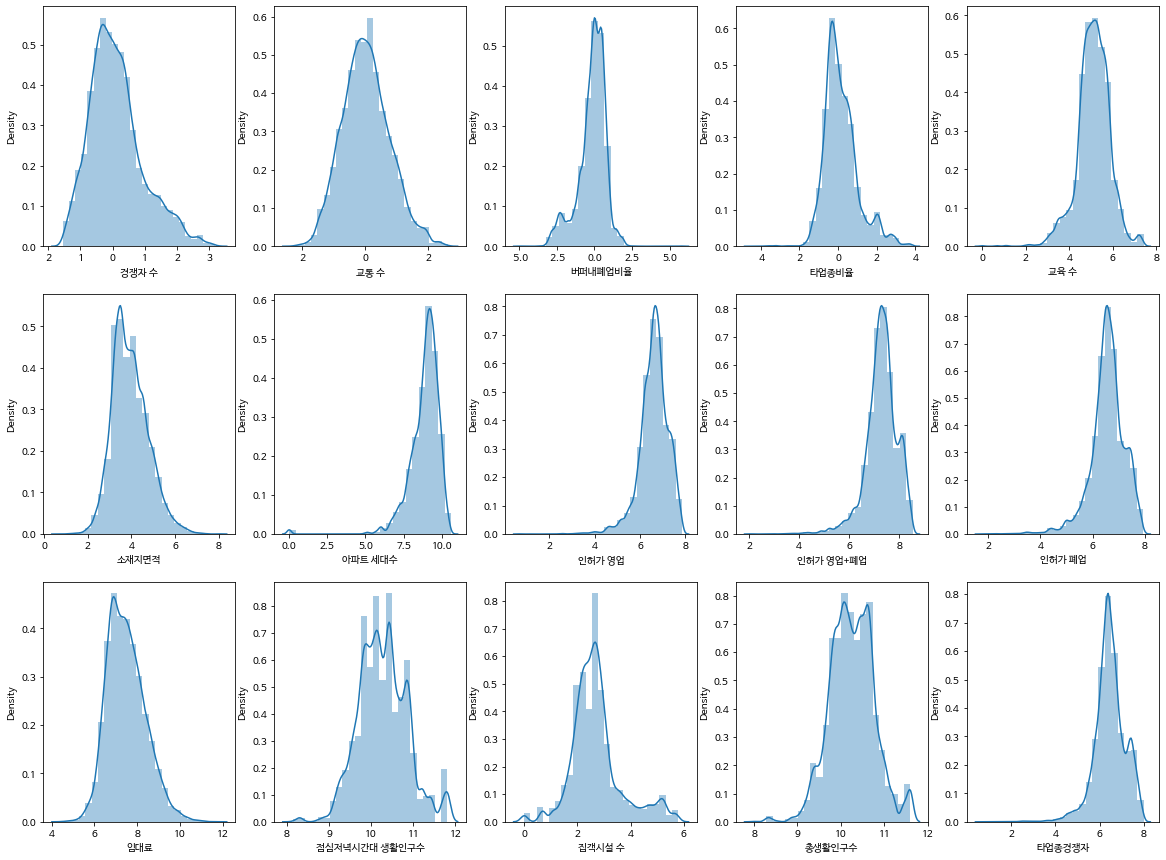

In [ ]:
col_n = 5
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))
for i,col in enumerate(robust.columns):
    sns.distplot(robust[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#연속형변수 전체 히스토그램그려보기    
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 

# 다중공선성 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

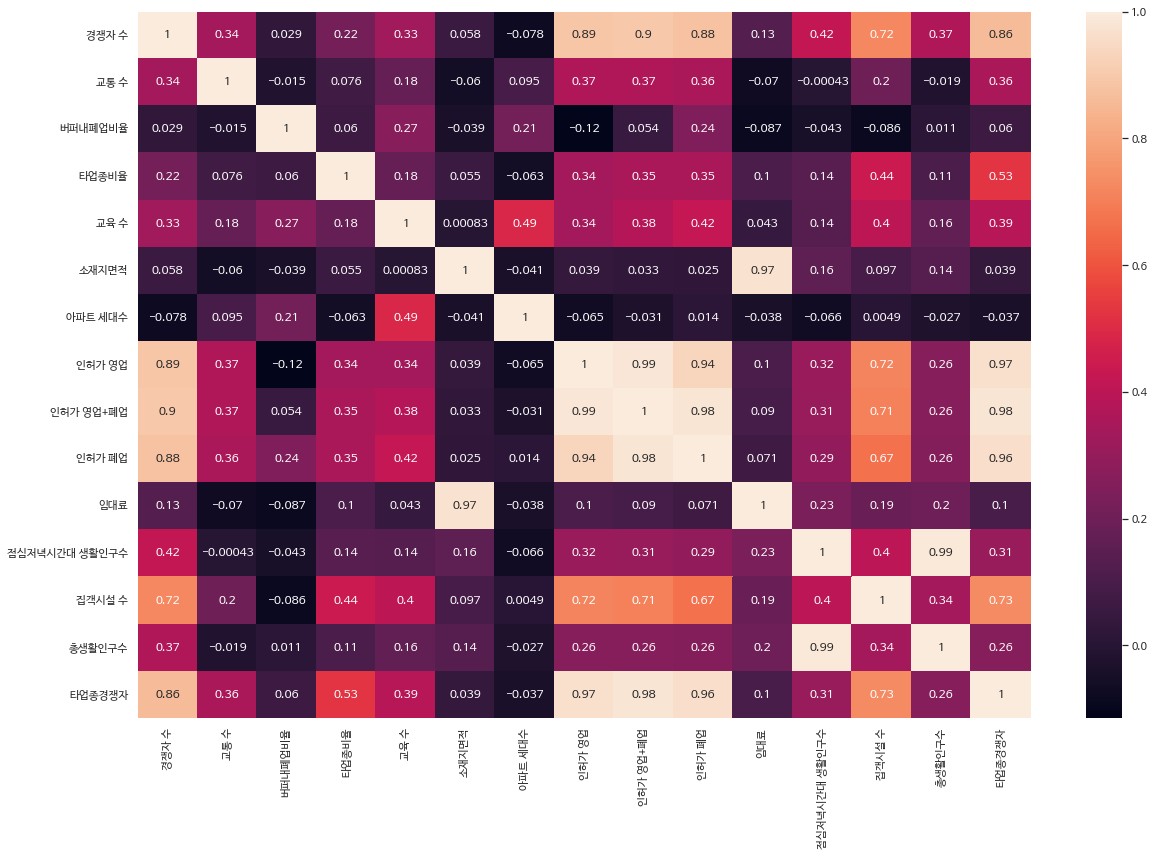

In [ ]:
#히트맵그리기- 코랩용
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
plt.rc("font", family = "NanumBarunGothic")
sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="NanumBarunGothic", style='white')
sns.heatmap(robust.corr(), annot = True) 
plt.show()

In [ ]:
#히트맵그리기- 주피터용
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
plt.rc("font", family = "Malgun Gothic")
sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="Malgun Gothic", style='white')
sns.heatmap(robust.corr(), annot = True) 
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#다중공선성 확인
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(robust.values, i) for i in range(robust.shape[1])] #x_data.shape[1]는 변수를 뜻함
vif['features'] = robust.columns
vif

,VIF Factor,features
0,7.393315e+00,경쟁자 수
1,1.294023e+00,교통 수
2,4.703331e+03,버퍼내폐업비율
3,6.861333e+01,타업종비율
4,1.030918e+02,교육 수
5,5.921762e+02,소재지면적
6,1.208416e+02,아파트 세대수
7,4.490111e+06,인허가 영업
8,1.785504e+05,인허가 영업+폐업
9,3.250412e+06,인허가 폐업


In [ ]:
vif = pd.DataFrame()
x_data2 = robust.drop('인허가 영업+폐업', axis=1) #인허가 영업+폐업 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,4.599895e+00,경쟁자 수
1,1.292939e+00,교통 수
2,3.961030e+03,버퍼내폐업비율
3,6.840278e+01,타업종비율
4,9.830934e+01,교육 수
5,4.793021e+02,소재지면적
6,1.197040e+02,아파트 세대수
7,3.527377e+06,인허가 영업
8,2.907732e+06,인허가 폐업
9,1.467173e+03,임대료


In [ ]:
vif = pd.DataFrame()
x_data3 = x_data2.drop('인허가 영업', axis=1) #인허가 영업 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,4.538539,경쟁자 수
1,1.292402,교통 수
2,36.728670,버퍼내폐업비율
3,50.161073,타업종비율
4,97.697317,교육 수
5,464.366077,소재지면적
6,116.422771,아파트 세대수
7,96849.958890,인허가 폐업
8,1414.614360,임대료
9,20106.506072,점심저녁시간대 생활인구수


In [ ]:
vif = pd.DataFrame()
x_data4 = x_data3.drop('인허가 폐업', axis=1) #인허가 폐업 칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,4.453202,경쟁자 수
1,1.263488,교통 수
2,1.354648,버퍼내폐업비율
3,1.903086,타업종비율
4,96.248431,교육 수
5,464.360575,소재지면적
6,116.328506,아파트 세대수
7,1413.973045,임대료
8,19684.126291,점심저녁시간대 생활인구수
9,29.399659,집객시설 수


In [ ]:
vif = pd.DataFrame()
x_data5 = x_data4.drop('소재지면적', axis=1) #소재지면적 칼럼을 제거, 이 이상 제거는 로지스틱 분석 후 검토
vif["VIF Factor"] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]
vif['features'] = x_data5.columns
vif

,VIF Factor,features
0,4.249502,경쟁자 수
1,1.237290,교통 수
2,1.297570,버퍼내폐업비율
3,1.886801,타업종비율
4,95.578641,교육 수
5,114.781501,아파트 세대수
6,75.148174,임대료
7,19443.377321,점심저녁시간대 생활인구수
8,29.291525,집객시설 수
9,21526.600139,총생활인구수


In [ ]:
x_data5 #제거후 데이터 프레임 확인

,경쟁자 수,교통 수,버퍼내폐업비율,타업종비율,교육 수,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,-0.282686,0.250000,0.782783,0.195532,5.075174,8.874728,7.757906,9.299934,2.079442,9.364879,6.340359
1,-0.323322,0.111111,0.964586,0.048642,5.017280,9.128805,6.654153,9.299934,2.197225,9.364879,6.263398
2,-0.422261,0.194444,0.910826,0.250727,5.075174,9.096500,6.654153,9.299934,2.197225,9.364879,6.240276
3,-0.450530,0.138889,0.867102,0.276314,5.135798,9.329012,6.617403,9.299934,2.197225,9.364879,6.222576
4,-0.473498,0.138889,0.919161,0.246031,5.105945,9.237372,7.134094,9.299934,2.079442,9.364879,6.192362
...,...,...,...,...,...,...,...,...,...,...,...
18247,0.673145,-0.138889,0.399920,-0.475307,5.398163,9.242420,7.995980,10.920147,2.484907,10.932251,6.697034
18248,-0.544170,-0.472222,0.322864,0.120959,5.713733,9.224539,8.363342,10.920147,2.197225,10.932251,6.086775
18249,0.678445,0.027778,0.125929,-0.215117,5.402677,9.254070,7.192182,10.920147,2.639057,10.932251,6.779922
18250,0.452297,-0.222222,0.143086,-0.451429,5.347108,9.265397,7.361375,10.920147,2.564949,10.932251,6.599870


In [ ]:
Adis #범주형 데이터 확인

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
18247,0,0,1,0,0,0
18248,0,0,1,0,0,0
18249,0,0,1,0,0,0
18250,0,0,1,0,0,0


In [ ]:
x_data5[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']]=Adis #범주형변수 데이터프레임 추가

In [ ]:
x_data5.head() #로지스틱 분석할 데이터 확인

,경쟁자 수,교통 수,버퍼내폐업비율,타업종비율,교육 수,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,-0.282686,0.250000,0.782783,0.195532,5.075174,8.874728,7.757906,9.299934,2.079442,9.364879,6.340359,1,0,0,0,0,0
1,-0.323322,0.111111,0.964586,0.048642,5.017280,9.128805,6.654153,9.299934,2.197225,9.364879,6.263398,1,0,0,0,0,0
2,-0.422261,0.194444,0.910826,0.250727,5.075174,9.096500,6.654153,9.299934,2.197225,9.364879,6.240276,1,0,0,0,0,0
3,-0.450530,0.138889,0.867102,0.276314,5.135798,9.329012,6.617403,9.299934,2.197225,9.364879,6.222576,1,0,0,0,0,0
4,-0.473498,0.138889,0.919161,0.246031,5.105945,9.237372,7.134094,9.299934,2.079442,9.364879,6.192362,1,0,0,0,0,1


## 로지스틱 회귀분석 준비

In [ ]:
korea = sm.add_constant(x_data5, has_constant="add")#데이터에 상수항 추가
korea.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,경쟁자 수,교통 수,버퍼내폐업비율,타업종비율,교육 수,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1.0,-0.282686,0.250000,0.782783,0.195532,5.075174,8.874728,7.757906,9.299934,2.079442,9.364879,6.340359,1,0,0,0,0,0
1,1.0,-0.323322,0.111111,0.964586,0.048642,5.017280,9.128805,6.654153,9.299934,2.197225,9.364879,6.263398,1,0,0,0,0,0
2,1.0,-0.422261,0.194444,0.910826,0.250727,5.075174,9.096500,6.654153,9.299934,2.197225,9.364879,6.240276,1,0,0,0,0,0
3,1.0,-0.450530,0.138889,0.867102,0.276314,5.135798,9.329012,6.617403,9.299934,2.197225,9.364879,6.222576,1,0,0,0,0,0
4,1.0,-0.473498,0.138889,0.919161,0.246031,5.105945,9.237372,7.134094,9.299934,2.079442,9.364879,6.192362,1,0,0,0,0,1


In [ ]:
#변수 구분
feature_columns = list(korea.columns.difference(['생존여부']))
x1= korea[feature_columns]
y1= korea['생존여부'] #폐업 0, 5년이상 생존 1

In [ ]:
#데이터구분
x_train, x_test, y_train, y_test = train_test_split(x1,y1,
                                                   train_size=0.7, test_size=0.3,
                                                   random_state=102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12776, 17) (5476, 17) (12776,) (5476,)


In [ ]:
y_train.value_counts() #불균형

0    10725
1     2051
Name: 생존여부, dtype: int64

# 오버샘플링

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
method=SMOTE()

In [ ]:
X_resampled,y_resampled=method.fit_resample(x_train,y_train) #오버샘플링

In [ ]:
X_resampled.shape #독립변수 구조 확인

(21450, 17)

In [ ]:
y_resampled.value_counts() #균형다시맞춤

0    10725
1    10725
Name: 생존여부, dtype: int64

In [ ]:
x_train=X_resampled #결과 다시 x_train변수에 담기

In [ ]:
y_train=y_resampled#결과 다시 y_train변수에 담기

In [ ]:
x_train.shape

(21450, 17)

In [ ]:
y_train.value_counts() #균형다시맞춤

0    10725
1    10725
Name: 생존여부, dtype: int64

# 로지스틱 회귀분석 시작

In [ ]:
#모델생성
model = sm.Logit(y_train,x_train)
results = model.fit(method = "newton")

         Current function value: 0.654221
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
#결과확인
results.summary() # '골목상권', '관광특구', '교육 수', '구분불가', '발달상권', '버퍼내폐업비율','아파트 세대수',  '전통시장'제거

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                21450
Model:                          Logit   Df Residuals:                    21433
Method:                           MLE   Df Model:                           16
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.05616
Time:                        05:23:46   Log-Likelihood:                -14033.
converged:                      False   LL-Null:                       -14868.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.5952   3629.448      0.005      0.996   -7095.993    7131.184
경쟁자 수            -0.4373      0.049     -8.963      0.000      -0.533      -0.342
골목상권            -22.7953   3629.448     -0.006      0.995   -7136.384    7090.793
관광특구            -23.7873   3629.448     -0.007      0.995   -7137.375    7089.801
교육 수             -0.0274      0.028     -0.993      0.321      -0.081       0.027
교통 수              0.1818      0.021      8.572      0.000       0.140       0.223
구분불가            -22.9686   3629.448     -0.006      0.995   -7136.557    7090.620
발달상권            -22.8885   3629.448     -0.006      0.995   -7136.477    7090.700
버퍼내폐업비율          -0.0354      0.018     -1.978      0.048      -0.071      -0.000
아파트 세대수           0.0024      0.018      0.135      0.893      -0.032       0.037
임대료               0.3757      0.018     21.151      0.000       0.341       0.411
전통시장            -23.1203   3629.448     -0.006      0.995   -7136.708    7090.468
점심저녁시간대 생활인구수     0.4182      0.217      1.930      0.054      -0.007       0.843
집객시설 수            0.0733      0.028      2.605      0.009       0.018       0.128
총생활인구수           -0.3678      0.237     -1.552      0.121      -0.832       0.097
타업종경쟁자            0.2854      0.062      4.570      0.000       0.163       0.408
타업종비율            -0.1215      0.026     -4.704      0.000      -0.172      -0.071
=================================================================================
"""

In [ ]:
results.params

const            17.595231
경쟁자 수            -0.437341
골목상권            -22.795323
관광특구            -23.787252
교육 수             -0.027373
교통 수              0.181782
구분불가            -22.968641
발달상권            -22.888550
버퍼내폐업비율          -0.035437
아파트 세대수           0.002398
임대료               0.375724
전통시장            -23.120255
점심저녁시간대 생활인구수     0.418168
집객시설 수            0.073269
총생활인구수           -0.367822
타업종경쟁자            0.285448
타업종비율            -0.121534
dtype: float64

In [ ]:
np.exp(results.params) #오즈비

const            4.380380e+07
경쟁자 수            6.457513e-01
골목상권             1.259264e-10
관광특구             4.670116e-11
교육 수             9.729979e-01
교통 수             1.199353e+00
구분불가             1.058878e-10
발달상권             1.147173e-10
버퍼내폐업비율          9.651833e-01
아파트 세대수          1.002400e+00
임대료              1.456046e+00
전통시장             9.099151e-11
점심저녁시간대 생활인구수    1.519177e+00
집객시설 수           1.076020e+00
총생활인구수           6.922404e-01
타업종경쟁자           1.330358e+00
타업종비율            8.855609e-01
dtype: float64

In [ ]:
#예측
y_pred = results.predict(x_test)
y_pred

7478     0.375587
758      0.376757
11816    0.557701
5316     0.437226
3806     0.584613
           ...   
15561    0.392273
2877     0.515971
6652     0.393283
2427     0.498134
16465    0.454656
Length: 5476, dtype: float64

In [ ]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))
#임계값 0.7예측
Y_pred = PRED(y_pred,0.7)
Y_pred

7478     0
758      0
11816    0
5316     0
3806     0
        ..
15561    0
2877     0
6652     0
2427     0
16465    0
Length: 5476, dtype: int64

In [ ]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[4530   48]
 [ 882   16]]


In [ ]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [ ]:
acc(cfmat) #정확도확인

0.8301680058436816

In [ ]:
f1 = f1_score(y_test,Y_pred,average='weighted')
print(f"f1:{f1:4f}") #f1 확인

f1:0.763640


# 로지스틱 변수 재설계 후 예측

In [ ]:
x_trainf = x_train.columns.difference(x_train[['골목상권', '관광특구', '교육 수', '구분불가', '발달상권', '버퍼내폐업비율','아파트 세대수',  '전통시장']].columns)
x_train2 = x_train[x_trainf] #훈련데이터 재구성

In [ ]:
x_train2.head()

,const,경쟁자 수,교통 수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,1.0,-0.081272,-0.833333,7.170888,9.883203,2.564949,9.787258,6.146329,-0.905469
1,1.0,1.491166,0.027778,6.349139,10.070093,2.944439,10.107232,7.073270,-0.272199
2,1.0,-0.275618,-0.916667,6.795706,10.242025,2.302585,10.165578,6.665684,1.267630
3,1.0,-0.729682,-0.138889,6.658011,9.838195,2.079442,9.943828,5.983936,0.457627
4,1.0,-0.934629,0.722222,7.536364,9.601765,2.772589,9.652403,5.594711,0.118594


In [ ]:
x_testf = x_test.columns.difference(x_test[['골목상권', '관광특구', '교육 수', '구분불가', '발달상권', '버퍼내폐업비율', '아파트 세대수', '전통시장']].columns)
x_test2 = x_test[x_testf]#테스트데이터에서 똑같이 반영

In [ ]:
x_test2.head()

,const,경쟁자 수,교통 수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
7478,1.0,2.146643,-0.555556,7.897296,10.970390,4.584967,10.912747,7.472501,0.400391
758,1.0,-0.360424,-0.527778,6.190315,9.165316,3.091042,9.255952,6.919684,2.335125
11816,1.0,-0.128975,0.527778,8.257904,10.356003,2.079442,10.446576,6.326149,-0.227843
5316,1.0,0.358657,-0.138889,7.162397,10.090575,2.708050,10.215498,6.594413,-0.314585
3806,1.0,0.045936,0.694444,7.976595,10.218587,2.833213,10.215819,6.618739,0.354584


In [ ]:
#모델생성
model = sm.Logit(y_train,x_train2)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.675910
         Iterations 5


In [ ]:
#결과확인
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                21450
Model:                          Logit   Df Residuals:                    21441
Method:                           MLE   Df Model:                            8
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.02487
Time:                        05:24:40   Log-Likelihood:                -14498.
converged:                       True   LL-Null:                       -14868.
Covariance Type:            nonrobust   LLR p-value:                2.260e-154
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.6405      0.573     -8.105      0.000      -5.763      -3.518
경쟁자 수            -0.3993      0.046     -8.686      0.000      -0.489      -0.309
교통 수              0.1684      0.021      8.197      0.000       0.128       0.209
임대료               0.3812      0.017     21.990      0.000       0.347       0.415
점심저녁시간대 생활인구수     0.9671      0.180      5.372      0.000       0.614       1.320
집객시설 수            0.0377      0.025      1.521      0.128      -0.011       0.086
총생활인구수           -0.9714      0.198     -4.903      0.000      -1.360      -0.583
타업종경쟁자            0.2661      0.059      4.491      0.000       0.150       0.382
타업종비율            -0.0880      0.025     -3.582      0.000      -0.136      -0.040
=================================================================================
"""

In [ ]:
results.params

const           -4.640519
경쟁자 수           -0.399338
교통 수             0.168408
임대료              0.381229
점심저녁시간대 생활인구수    0.967063
집객시설 수           0.037666
총생활인구수          -0.971408
타업종경쟁자           0.266061
타업종비율           -0.088030
dtype: float64

In [ ]:
np.exp(results.params)

const            0.009653
경쟁자 수            0.670764
교통 수             1.183419
임대료              1.464083
점심저녁시간대 생활인구수    2.630209
집객시설 수           1.038384
총생활인구수           0.378550
타업종경쟁자           1.304815
타업종비율            0.915733
dtype: float64

In [ ]:
#예측
y_pred = results.predict(x_test2)
y_pred

7478     0.390142
758      0.354004
11816    0.573603
5316     0.411540
3806     0.572921
           ...   
15561    0.409790
2877     0.508660
6652     0.403548
2427     0.474821
16465    0.503899
Length: 5476, dtype: float64

In [ ]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))
#임계값 0.7예측
Y_pred = PRED(y_pred,0.7)
Y_pred

7478     0
758      0
11816    0
5316     0
3806     0
        ..
15561    0
2877     0
6652     0
2427     0
16465    0
Length: 5476, dtype: int64

In [ ]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[4518   60]
 [ 876   22]]


In [ ]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [ ]:
acc(cfmat) #정확도 확인

0.829072315558802

In [ ]:
f1 = f1_score(y_test,Y_pred,average='weighted')
print(f"f1:{f1:4f}") #f1스코어 확인

f1:0.764904


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#적절한 k찾기
test_acc=[]
for n in range(1,10):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train2,y_train)
    y_pred=clf.predict(x_test2)
    test_acc.append(accuracy_score(y_test,y_pred))
    
    print("k: {}, 정확도: {}".format(n,accuracy_score(y_test,y_pred)))

k: 1, 정확도: 0.6869978086194303
k: 2, 정확도: 0.7308254200146092
k: 3, 정확도: 0.6369612856099343
k: 4, 정확도: 0.6798758217677137
k: 5, 정확도: 0.614499634769905
k: 6, 정확도: 0.6548575602629657
k: 7, 정확도: 0.5929510591672754
k: 8, 정확도: 0.6389700511322133
k: 9, 정확도: 0.5882030679327976


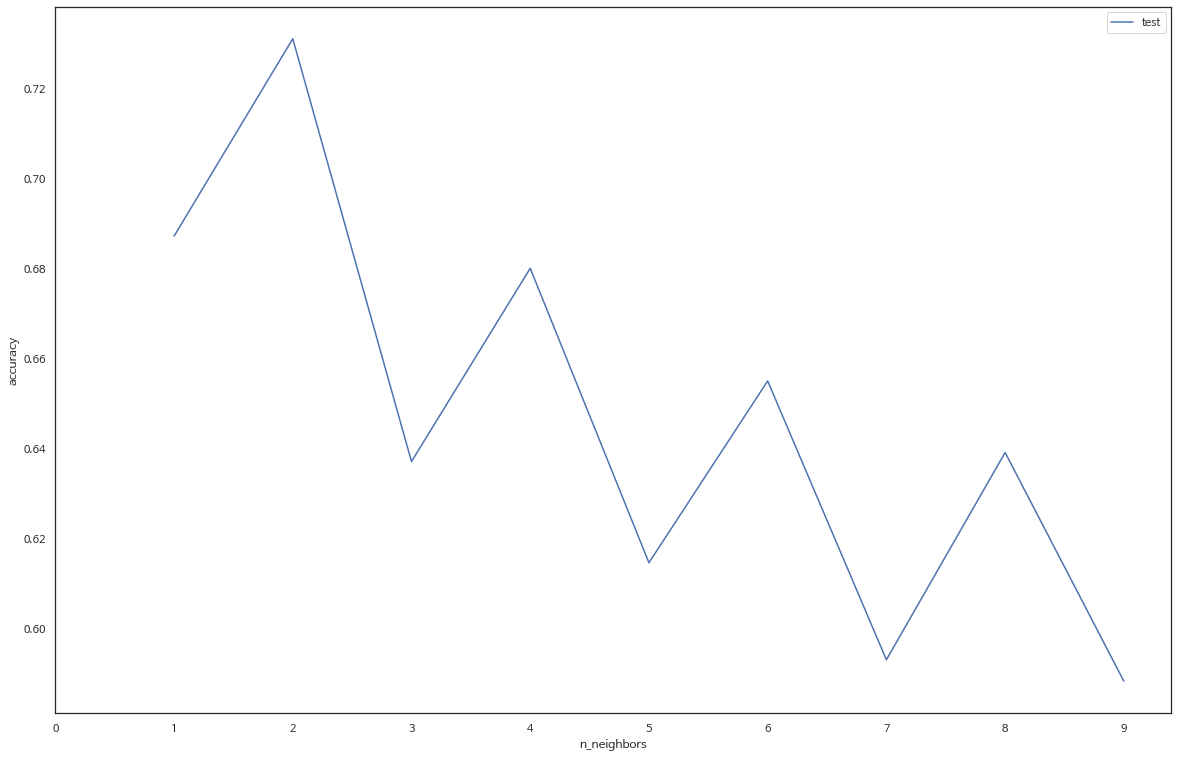

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#그래프로 최적 k 확인
plt.figure()
plt.plot(range(1,10),test_acc,label='test')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0,10,step=1))
plt.legend()
plt.show()

In [ ]:
clf=KNeighborsClassifier(2)
clf.fit(x_train2,y_train) #knn 모델 생성

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred=clf.predict(x_test2) #예측

In [ ]:
cmat=confusion_matrix(y_test,y_pred) #성능확인
print(cmat)

[[3799  779]
 [ 695  203]]


In [ ]:
acc=accuracy_score(y_test,y_pred) #f-1, 정확도확인
f1 = f1_score(y_test,y_pred,average='weighted')
print(f"f1:{f1:4f} acc:{acc:.4f}")

f1:0.735593 acc:0.7308


# 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100,
                               max_depth = 15,
                                n_jobs = -1,
                                 verbose = 1,
                               random_state = 101)
rf_clf.fit(x_train2, y_train)
pred = rf_clf.predict(x_test2)
print(accuracy_score(y_test, pred)) #랜덤포레스트 처음 모델 생성 후 정확도 확인
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='weighted')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}") #f1, accuracy

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


0.6860847333820307
f1:0.712433 accuracy:0.6861


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished


In [ ]:
#성능확인
cmat = confusion_matrix(y_test,pred)
print(cmat)

[[3450 1128]
 [ 591  307]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators' : [100, 200],
          'max_depth' : [6, 8, 10, 12],
         'min_samples_leaf' : [8,12,18],
         'min_samples_split' : [8, 16, 20]}

rf_clf4 = RandomForestClassifier(random_state = 103,
                                 n_jobs = -1,
                                 verbose = 1)
grid_cv1 = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3)

grid_cv1.fit(x_train2, y_train)

grid_cv2 = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3,
                       scoring='f1')

grid_cv2.fit(x_train2, y_train)
#f1스코어 모델 기준 예측값
pred=grid_cv2.predict(x_test2)

print('최적 하이퍼 마라미터: ', grid_cv1.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv1.best_score_))
print('최적 하이퍼 마라미터: ', grid_cv2.best_params_)
print('최고 f1-score: {:.4f}'.format(grid_cv2.best_score_))

#최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 500}
#최고 예측 정확도: 0.7495

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.7s finished


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 예측 정확도: 0.7417
최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 f1-score: 0.7499


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [ ]:
#gridcv 성능확인
cmat=confusion_matrix(y_test,pred)
print(cmat)

[[3260 1318]
 [ 529  369]]


# boosting - xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

# 검증 데이터 넣어주어서 교차검증 해보도록하기
evals = [(x_test2, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,
                           max_depth=3)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper.fit(x_train2, y_train, early_stopping_rounds=200,
               eval_set=evals, eval_metric='logloss')

pred = xgb_wrapper.predict(x_test2)
pred_proba = xgb_wrapper.predict_proba(x_test2)[:, 1]
print(pred_proba[:10])

accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='weighted')
print(f"f1:{f1:4f} accuracy:{accuracy:.4f}") #f1 accuracy

[0]	validation_0-logloss:0.689904
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.687426
[2]	validation_0-logloss:0.685283
[3]	validation_0-logloss:0.682671
[4]	validation_0-logloss:0.68131
[5]	validation_0-logloss:0.680091
[6]	validation_0-logloss:0.679022
[7]	validation_0-logloss:0.677383
[8]	validation_0-logloss:0.676479
[9]	validation_0-logloss:0.67502
[10]	validation_0-logloss:0.674605
[11]	validation_0-logloss:0.673352
[12]	validation_0-logloss:0.672955
[13]	validation_0-logloss:0.672042
[14]	validation_0-logloss:0.671404
[15]	validation_0-logloss:0.670886
[16]	validation_0-logloss:0.670395
[17]	validation_0-logloss:0.67004
[18]	validation_0-logloss:0.669712
[19]	validation_0-logloss:0.667604
[20]	validation_0-logloss:0.667158
[21]	validation_0-logloss:0.667023
[22]	validation_0-logloss:0.666546
[23]	validation_0-logloss:0.666216
[24]	validation_0-logloss:0.665953
[25]	validation_0-logloss:0.665642
[26]	validation_0-logloss:0.665508

In [ ]:
#성능확인
cmat = confusion_matrix(y_test,pred)
print(cmat)

[[4159  419]
 [ 762  136]]


In [ ]:
xgb_wrapper.predict(x_test2)

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
print("##########################################")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,5,8,10,15] ,
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.05, 0.1],
    'gamma': [0.5,1,2,3], 
    'colsample_bytree' : [0.8,0.9],
    'random_state':[99]
}


grid_cv = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1)
grid_cv.fit(x_train2, y_train)
grid_cv2 = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1, scoring='f1')
grid_cv2.fit(x_train2, y_train)

pred = grid_cv2.predict(x_test2) #f1스코어기준 모델의 예측값

print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)
print("최적의 파라미터:", grid_cv2.best_params_)
print("최고의 f1socre :", grid_cv2.best_score_)
# 최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'random_state': 99}
# 최고의 정확도 : 0.8585081585081585
# 최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
# 최고의 f1socre : 0.8378492746539946

##########################################
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Fitting 3 folds for each of 240 candidates, totalling 720 fits
최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'random_state': 99}
최고의 정확도 : 0.8585081585081585
최적의 파라미터: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
최고의 f1socre : 0.8378492746539946


In [ ]:
cmat=confusion_matrix(y_test,pred)
print(cmat) #f1스코어기준 혼동행렬

[[4163  415]
 [ 773  125]]


In [ ]:
# #주피터
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
#코랩에서
plt.rc('font', family='NanumBarunGothic') 

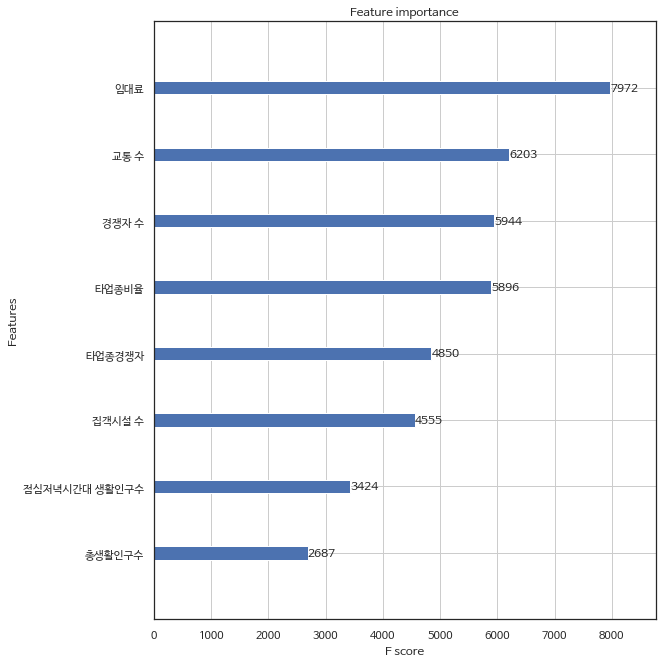

In [ ]:
# feature별 중요도 시각화하기
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,11))
plot_importance(grid_cv2.best_estimator_, ax)

<변수선택>


다중공선성 제외변수 : 인허가 영업+폐업, 인허가 영업, 인허가 폐업, 소재지면적


로지스틱 제외변수 : 골목상권, 관광특구, 교육 수, 발달상권, 버퍼내폐업비율, 아파트 세대수, 전통시장

최종변수 : 경쟁자 수, 교통 수, 임대료, 점심저녁시간대 생활인구수, 집객시설 수, 총생활인구수, 타업종경쟁자, 타업종비율

<모형>
로지스틱 : 
f1 : 0.764904, acc : 0.829072315558802


KNN(k=2) : 
f1 : 0.735593,  acc : 0.7308


랜덤포레스트 : 
f1 : 0.712433,  acc : 0.6861


랜덤포레스트(grid) : 
f1 : 0.7499, acc : 0.7417


XGBoost : 
f1 : 0.762770, acc : 0.7843


XGBoost(grid) : 
f1 : 0.8283028050016553, acc : 0.8405092592592592

<변수 중요도>

임대료 > 교통 수 > 경쟁자 수 > 타업종비율 > 집객시설 수 > 타업종경쟁자 >  점심저녁시간대 생활인구수 > 총생활인구수

<최종 모형> 

XGBoost-grid

# **예측**

In [ ]:
#예측할 데이터 불러오기
forecast = pd.read_csv('/content/drive/MyDrive/bigdata_ML/한식예측용.csv', encoding='cp949') #csv 불러오기, 코랩

forecast.head()

In [ ]:
# #예측할 데이터 불러오기
# forecast = pd.read_csv('한식예측용.csv', encoding='cp949') #csv 불러오기, 주피터

# forecast.head()

In [ ]:
kf = sm.add_constant(forecast, has_constant="add")#데이터에 상수항 추가
kf

In [ ]:
xgb_wrapper1 = XGBClassifier(colsample_bytree = 0.9, 
                            gamma = 0.5, learning_rate = 0.1, max_depth = 15, n_estimators = 200, random_state = 99)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper1.fit(x_train2, y_train,  eval_metric='logloss')

kfpred = xgb_wrapper1.predict(kf)
kfpred_proba = xgb_wrapper1.predict_proba(kf)[:, 1]
print(kfpred_proba[:10])


In [ ]:
live = pd.DataFrame(kfpred)

In [ ]:
live.to_csv('hlive.csv',index=False,encoding='cp949') 

In [ ]:
live2 = pd.DataFrame(kfpred_proba)

In [ ]:
live2.to_csv('hlive1.csv',index=False,encoding='cp949') 